# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error as mse

C:\Users\zoesu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os # accessing directory structure
import zipfile
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import andrews_curves
import math
import datetime as dt
from datetime import datetime
from dateutil.parser import parse

# Get Data

In [4]:
def unzip_folder(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

# Example usage:
zip_file_path = 'path/to/your/your_archive.zip'
extract_to_path = 'path/to/extract/folder'

unzip_folder('data.zip', 'data')

In [5]:
df = pd.read_csv('data/daily_song_ranking.csv')
df3 = pd.read_csv('data/spotify_tracks_2017.csv')
df.columns = (df.columns.str.lower()
                .str.replace(' ', '_'))
df.columns

Index(['position', 'track_name', 'artist', 'streams', 'url', 'date', 'region'], dtype='object')

In [6]:
df.head()

,position,track_name,artist,streams,url,date,region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,1/1/2017,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,1/1/2017,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,1/1/2017,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,1/1/2017,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,1/1/2017,ec


In [7]:
df = df[df['region'].str.contains("us")].reset_index(drop=True)
df.head()

,position,track_name,artist,streams,url,date,region
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,1/1/2017,us
1,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,1/1/2017,us
2,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,1/1/2017,us
3,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,1/1/2017,us
4,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,1/1/2017,us


In [8]:
df3 = df3.rename(columns={'name': 'track_name','artists': 'artist'})
df3 = df3.drop(columns=['id'])
df3.head()

,track_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [9]:
df.drop('url', axis=1, inplace=True)

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['date'].max()

Timestamp('2018-01-09 00:00:00')

In [12]:
df[df['track_name'].isna()]

,position,track_name,artist,streams,date,region
39407,8,NaN,NaN,888014,2017-07-20,us
39415,16,NaN,NaN,686345,2017-07-20,us
39432,33,NaN,NaN,545760,2017-07-20,us
39462,63,NaN,NaN,321287,2017-07-20,us
39609,10,NaN,NaN,861610,2017-07-21,us
39619,20,NaN,NaN,711341,2017-07-21,us
39635,36,NaN,NaN,553060,2017-07-21,us
39695,96,NaN,NaN,326507,2017-07-21,us
39940,141,NaN,NaN,213651,2017-07-22,us
40124,125,NaN,NaN,198912,2017-07-23,us


In [13]:
df.head()

,position,track_name,artist,streams,date,region
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017-01-01,us
1,2,Fake Love,Drake,1180074,2017-01-01,us
2,3,Starboy,The Weeknd,1064351,2017-01-01,us
3,4,Closer,The Chainsmokers,1010492,2017-01-01,us
4,5,Black Beatles,Rae Sremmurd,874289,2017-01-01,us


In [14]:
dftotal = df.groupby('date').agg({'streams': 'sum'}).rename(columns={'streams': 'streams'})
# Resetting index to make 'date' a regular column
dftotal.reset_index(inplace=True)
dftotal.head()

,date,streams
0,2017-01-01,55139058
1,2017-01-02,48894824
2,2017-01-03,55168814
3,2017-01-04,55939894
4,2017-01-05,56235124


In [15]:
df = pd.merge(df, df3, on=['track_name','artist'], how='left')
df.head()

,position,track_name,artist,streams,date,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017-01-01,us,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,343150.0,4.0
1,2,Fake Love,Drake,1180074,2017-01-01,us,0.927,0.488,9.0,-9.433,0.0,0.4200,0.108,0.000000,0.196,0.605,133.987,210937.0,4.0
2,3,Starboy,The Weeknd,1064351,2017-01-01,us,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165,0.000003,0.134,0.535,186.054,230453.0,4.0
3,4,Closer,The Chainsmokers,1010492,2017-01-01,us,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,244960.0,4.0
4,5,Black Beatles,Rae Sremmurd,874289,2017-01-01,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Total Stream Prediction

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set 'date' as the index
dftotal.set_index('date', inplace=True)

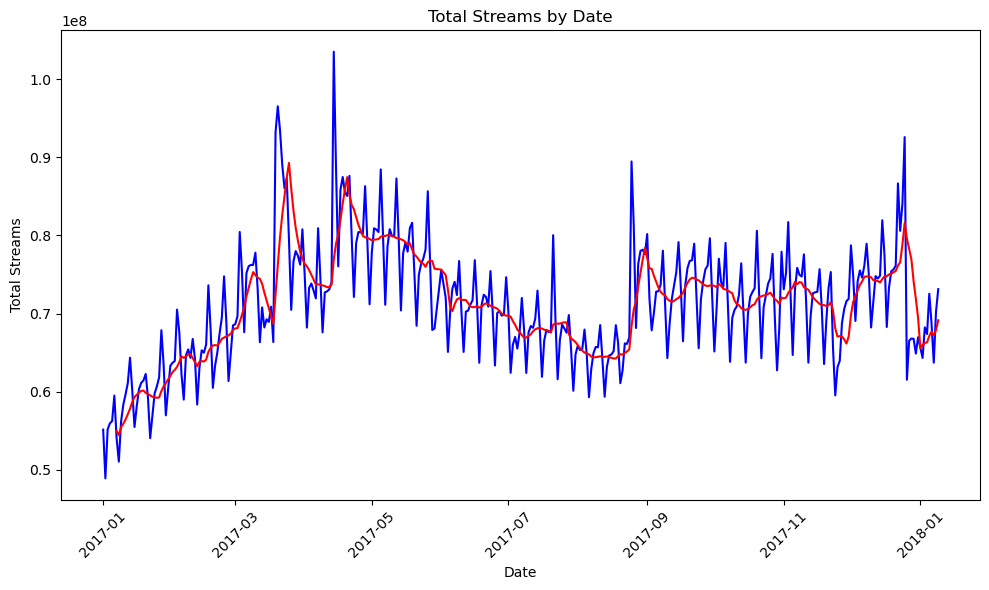

In [17]:
rollmean = pd.DataFrame.rolling(dftotal['streams'], window = 7).mean()

plt.figure(figsize=(10, 6))
plt.plot(dftotal, color='blue')
plt.plot(rollmean, color = 'red', label = 'mean')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Total Streams by Date')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [19]:
dftotal.head()

,streams
date,
2017-01-01,55139058
2017-01-02,48894824
2017-01-03,55168814
2017-01-04,55939894
2017-01-05,56235124


## SARIMA

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dftotal['streams'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.8531323739606194
p-value: 0.05107582289232768
Critical Values: {'1%': -3.448853029339765, '5%': -2.869693115704379, '10%': -2.571113512498422}


In [21]:
# First difference
dftotal_diff = dftotal['streams'].diff().dropna()

# ADF test on the differenced series
result_diff = adfuller(dftotal_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

ADF Statistic (Differenced): -6.9718785806731844
p-value (Differenced): 8.622977596137858e-10
Critical Values (Differenced): {'1%': -3.448853029339765, '5%': -2.869693115704379, '10%': -2.571113512498422}


C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


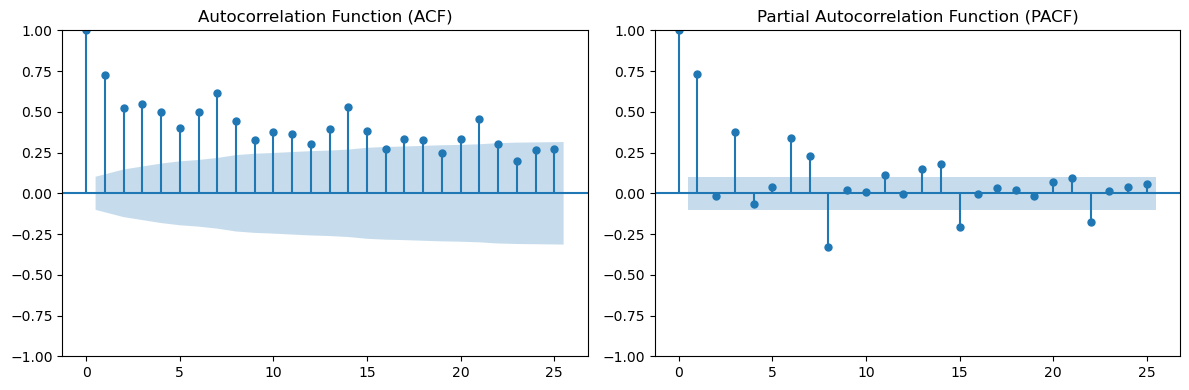

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(dftotal['streams'], lags=25, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(dftotal['streams'], lags=25, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [23]:
# Calculate the index for the split based on the percentage
split_index = int(len(dftotal) * 0.8)

# Extract training and testing sets
train = dftotal[:split_index]
test = dftotal[split_index:]

In [24]:
# SARIMA parameters based on interpretation
order = (0, 1, 1)  # Non-seasonal part
seasonal_order = (0, 1, 1, 7)  # Seasonal part

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(train['streams'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           streams   No. Observations:                  296
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -4648.648
Date:                           Fri, 01 Dec 2023   AIC                           9303.295
Time:                                   16:04:50   BIC                           9314.189
Sample:                                        0   HQIC                          9307.665
                                           - 296                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1206      0.089     -1.361      0.174      -0.294       0.053
ma.S.L7       -0.5306      0.023    -23.104

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


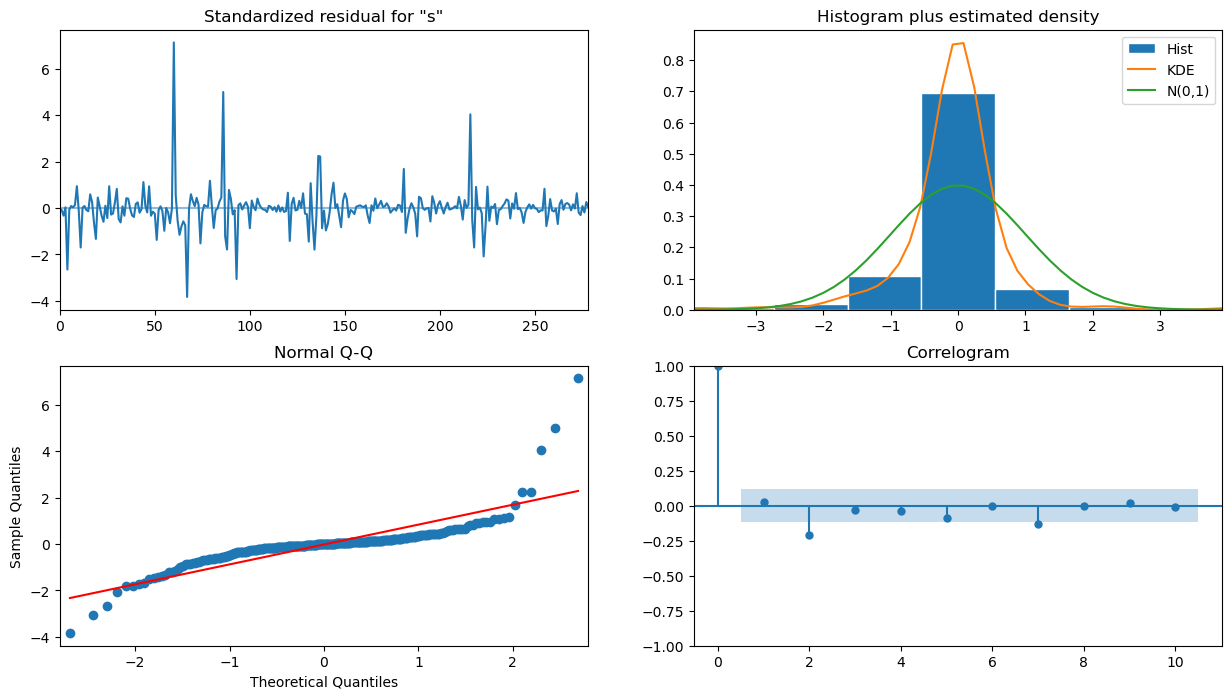

In [25]:
# Plot diagnostics
sarima_results.plot_diagnostics(figsize=(15, 8))
plt.show()

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


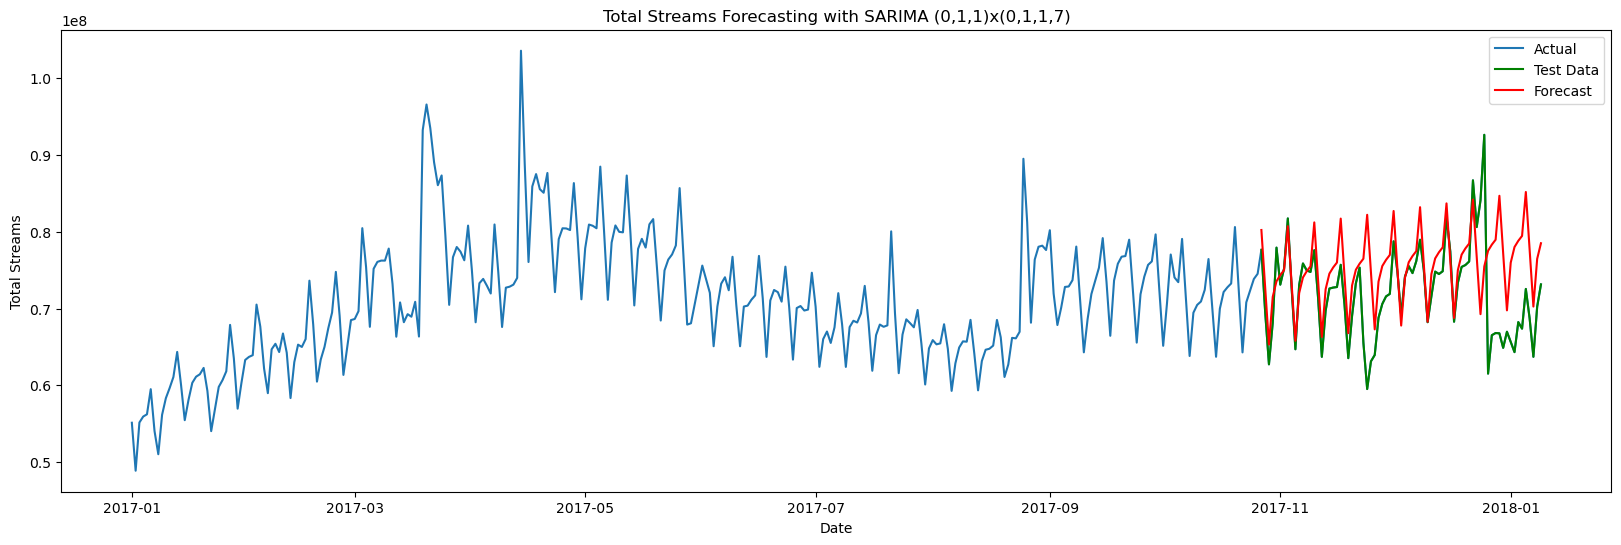

In [26]:
# Forecast future values
forecast_steps = len(test)  # Forecast for the length of the test set
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Corrected: Access the index directly for the forecast
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(dftotal['streams'], label='Actual')
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#plt.scatter(test.index, test['streams'], label='Test Data', color='green')  # Add test data points
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Total Streams Forecasting with SARIMA (0,1,1)x(0,1,1,7)')
plt.legend()
plt.show()

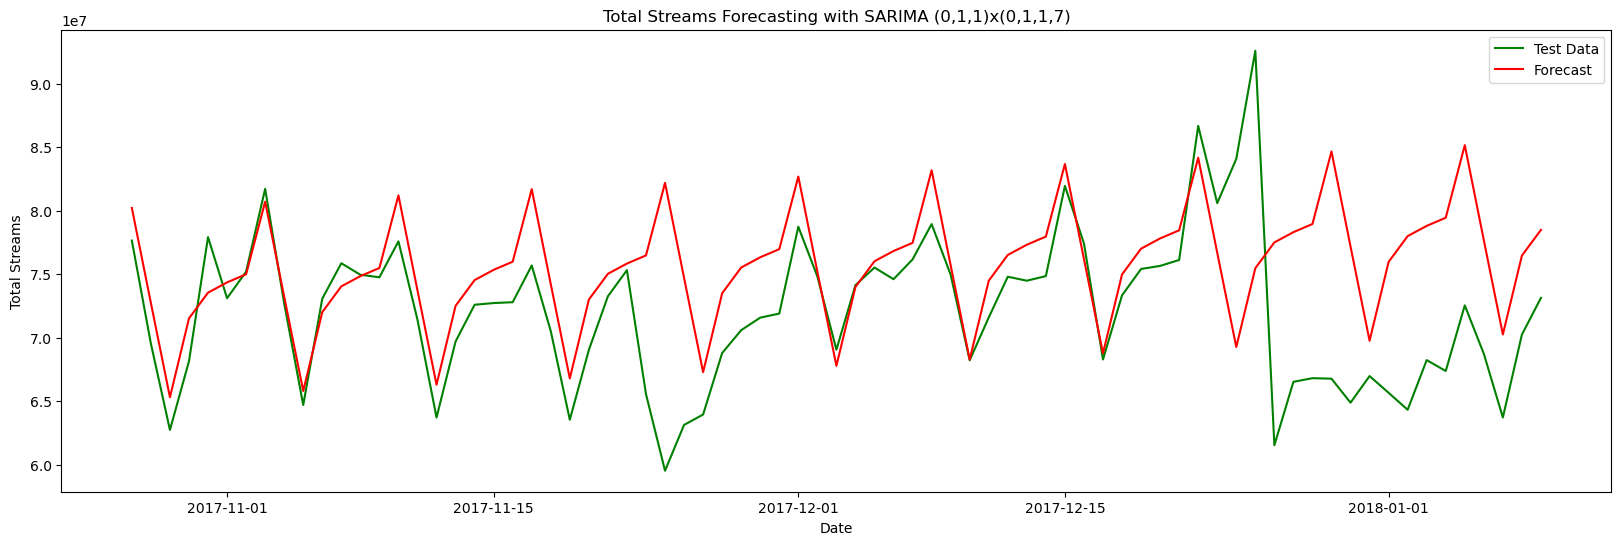

In [27]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Total Streams Forecasting with SARIMA (0,1,1)x(0,1,1,7)')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test['streams'].values

# Extract the predicted values from the forecast
predicted_values = forecast.predicted_mean.values

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 4856588.190690315
Mean Squared Error (MSE): 48219852107978.445
Root Mean Squared Error (RMSE): 6944051.562883044
Mean Absolute Percentage Error (MAPE): 6.99%


## Second

In [29]:
# SARIMA parameters based on interpretation
order = (1, 0, 0)  # Non-seasonal part
seasonal_order = (1, 1, 1, 7)  # Seasonal part

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(train['streams'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             streams   No. Observations:                  296
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -4664.100
Date:                             Fri, 01 Dec 2023   AIC                           9336.200
Time:                                     16:04:51   BIC                           9350.754
Sample:                                          0   HQIC                          9342.037
                                             - 296                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7362      0.048     15.373      0.000       0.642       0.830
ar.S.L7       -0.2846      

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


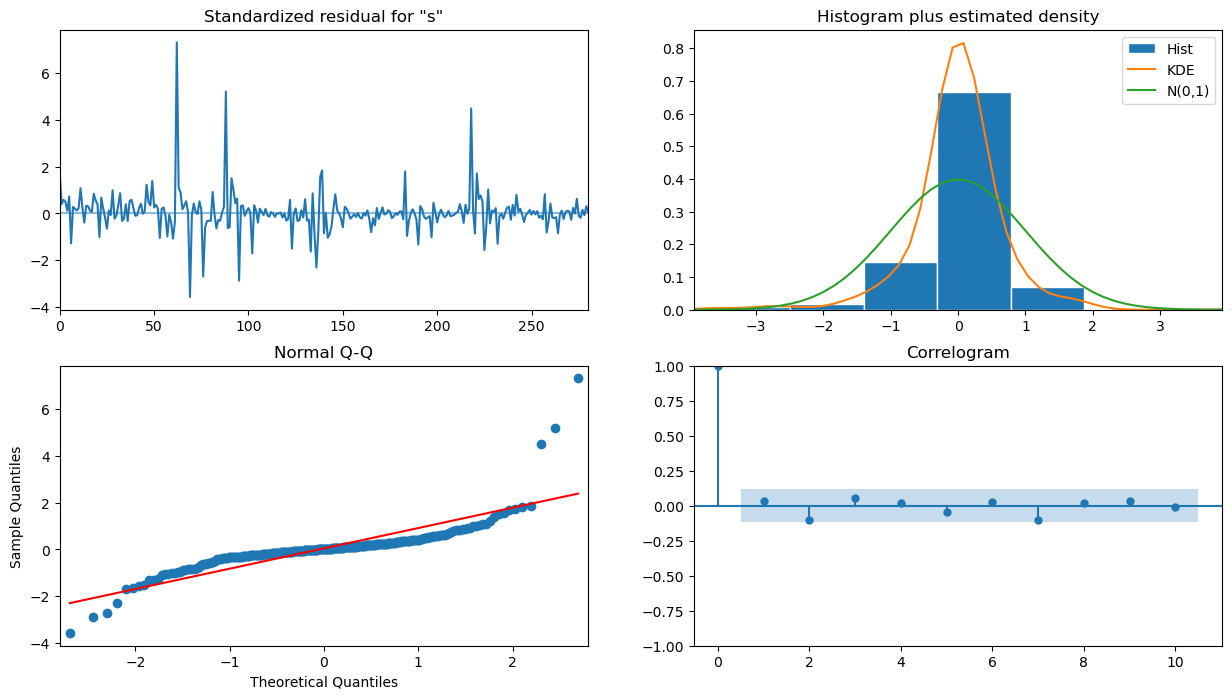

In [30]:
# Plot diagnostics
sarima_results.plot_diagnostics(figsize=(15, 8))
plt.show()

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


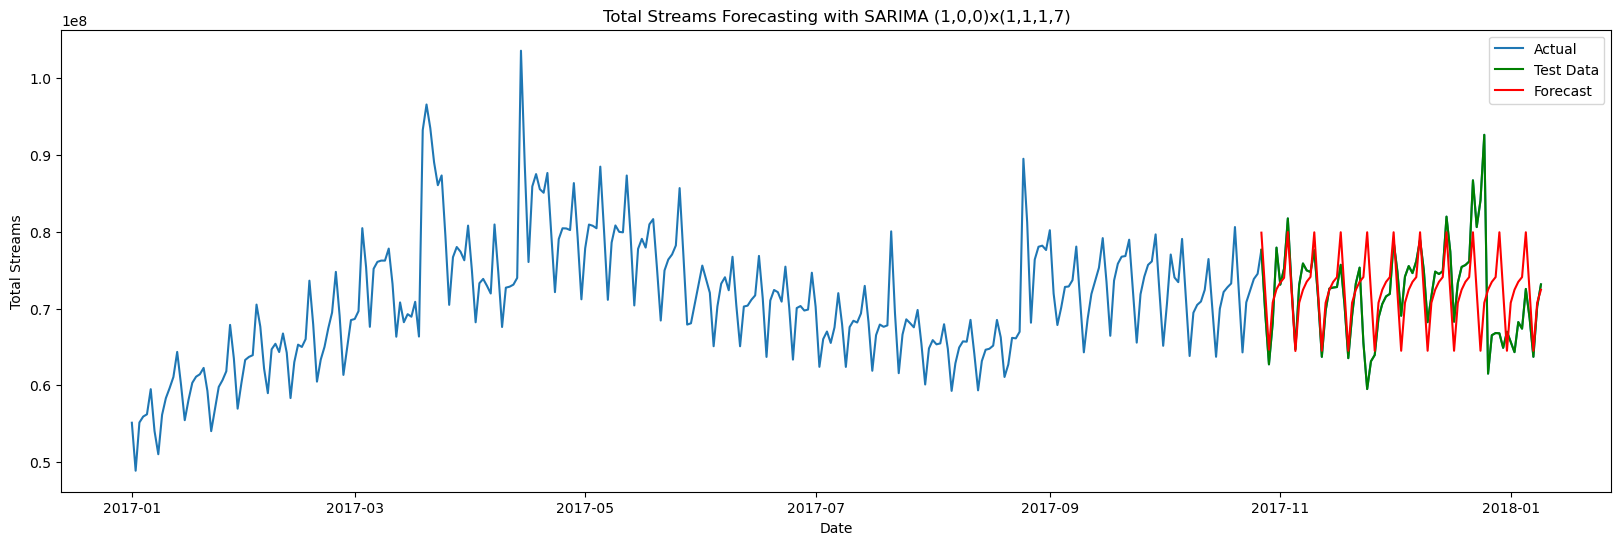

In [31]:
# Forecast future values
forecast_steps = len(test)  # Forecast for the length of the test set
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Corrected: Access the index directly for the forecast
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(dftotal['streams'], label='Actual')
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#plt.scatter(test.index, test['streams'], label='Test Data', color='green')  # Add test data points
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Total Streams Forecasting with SARIMA (1,0,0)x(1,1,1,7)')
plt.legend()
plt.show()

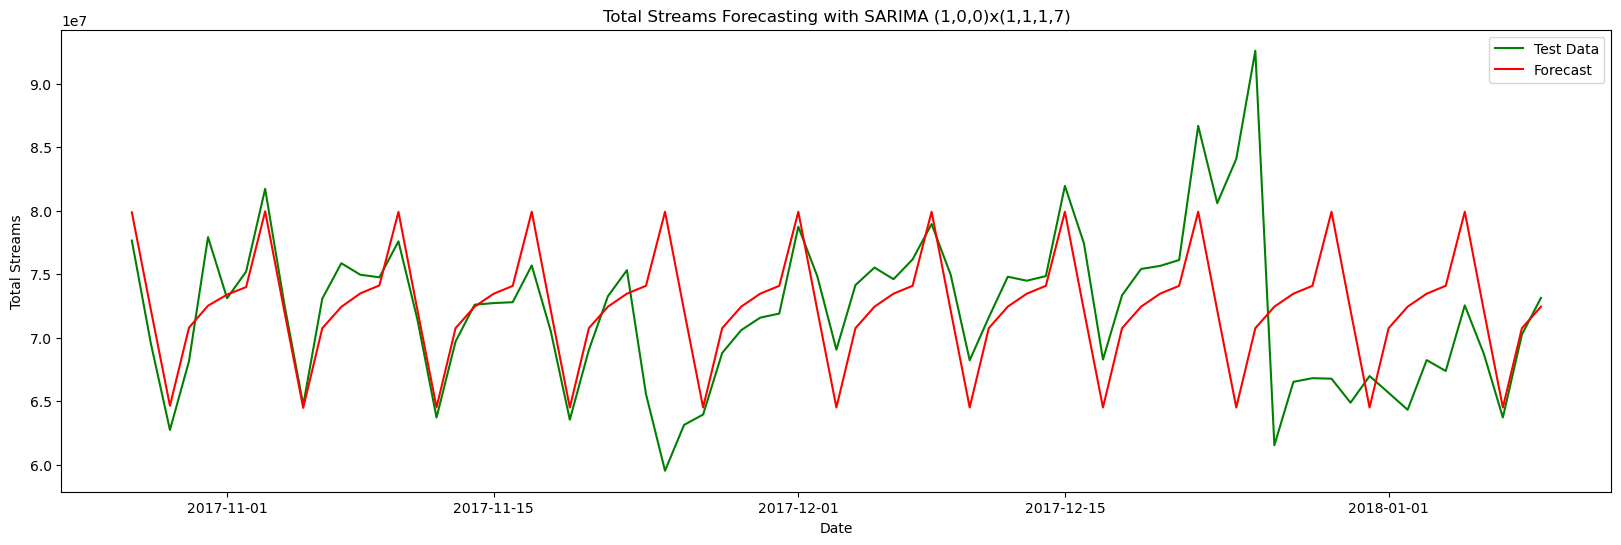

In [32]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Total Streams Forecasting with SARIMA (1,0,0)x(1,1,1,7)')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test['streams'].values

# Extract the predicted values from the forecast
predicted_values = forecast.predicted_mean.values

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 3805899.898611277
Mean Squared Error (MSE): 33594879276368.594
Root Mean Squared Error (RMSE): 5796108.977268163
Mean Absolute Percentage Error (MAPE): 5.33%


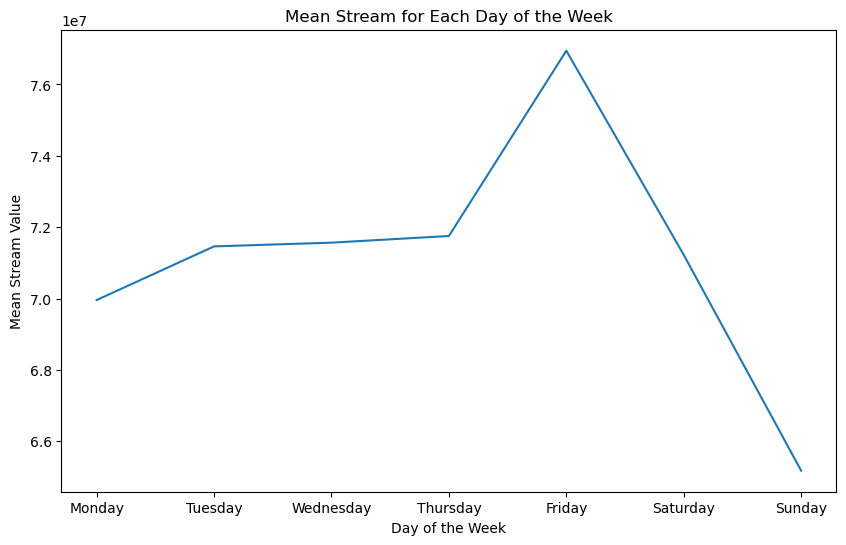

In [34]:
dftotal = df.groupby('date').agg({'streams': 'sum'}).rename(columns={'streams': 'streams'})
# Resetting index to make 'date' a regular column
dftotal.reset_index(inplace=True)

# Extract day of the week from the date and create a new column 'day_of_week'
dftotal['day_of_week'] = dftotal['date'].dt.day_name()

# Calculate the mean stream for each day of the week
daily_mean = dftotal.groupby('day_of_week')['streams'].mean()

# Order the days of the week for proper plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_mean = daily_mean.reindex(days_order)

# Plot the mean stream for each day of the week
plt.figure(figsize=(10, 6))
plt.plot(daily_mean.index, daily_mean)
plt.title('Mean Stream for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Stream Value')
plt.show()

## LSTM

In [35]:
dftotal.set_index('date', inplace=True)

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Preprocess the data
data = dftotal['streams'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the function to create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i : i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define the sequence length (adjust as needed)
seq_length = 10

# Create sequences and labels
sequences, labels = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split_index = int(len(sequences) * 0.8)
X_train, y_train = sequences[:split_index], labels[:split_index]
X_test, y_test = sequences[split_index:], labels[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(predicted_values)


Epoch 1/50
9/9 - 2s - loss: 0.0889 - val_loss: 0.0471 - 2s/epoch - 176ms/step
Epoch 2/50
9/9 - 0s - loss: 0.0262 - val_loss: 0.0118 - 98ms/epoch - 11ms/step
Epoch 3/50
9/9 - 0s - loss: 0.0139 - val_loss: 0.0163 - 108ms/epoch - 12ms/step
Epoch 4/50
9/9 - 0s - loss: 0.0109 - val_loss: 0.0116 - 83ms/epoch - 9ms/step
Epoch 5/50
9/9 - 0s - loss: 0.0106 - val_loss: 0.0118 - 66ms/epoch - 7ms/step
Epoch 6/50
9/9 - 0s - loss: 0.0101 - val_loss: 0.0116 - 79ms/epoch - 9ms/step
Epoch 7/50
9/9 - 0s - loss: 0.0100 - val_loss: 0.0118 - 76ms/epoch - 8ms/step
Epoch 8/50
9/9 - 0s - loss: 0.0102 - val_loss: 0.0115 - 63ms/epoch - 7ms/step
Epoch 9/50
9/9 - 0s - loss: 0.0100 - val_loss: 0.0115 - 66ms/epoch - 7ms/step
Epoch 10/50
9/9 - 0s - loss: 0.0099 - val_loss: 0.0115 - 87ms/epoch - 10ms/step
Epoch 11/50
9/9 - 0s - loss: 0.0099 - val_loss: 0.0115 - 74ms/epoch - 8ms/step
Epoch 12/50
9/9 - 0s - loss: 0.0099 - val_loss: 0.0115 - 65ms/epoch - 7ms/step
Epoch 13/50
9/9 - 0s - loss: 0.0099 - val_loss: 0.0116 - 

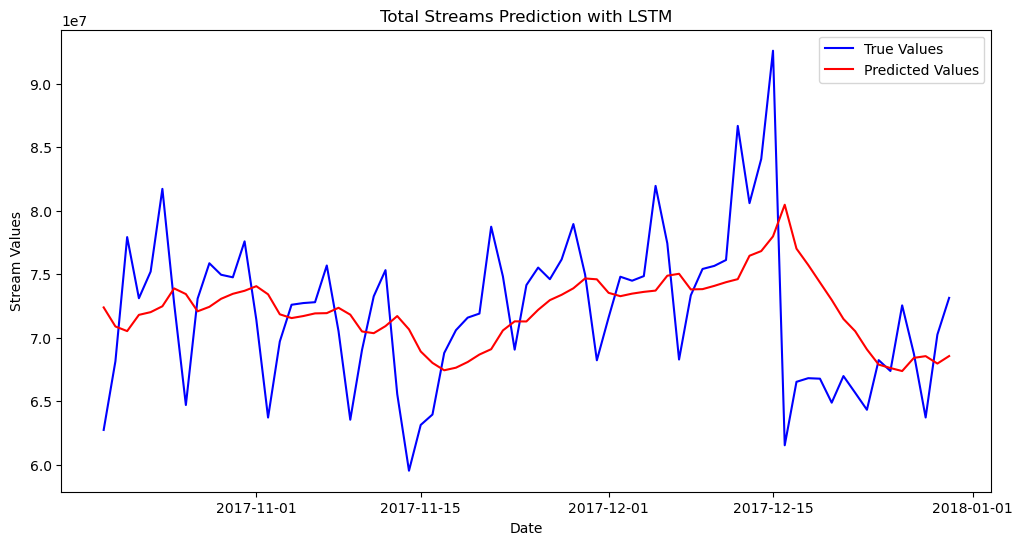

In [37]:
import matplotlib.pyplot as plt

# Get the dates corresponding to the test set
test_dates = dftotal.index[split_index : split_index + len(predicted_values)]

# Inverse transform the original test data to the original scale
true_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, true_values, label='True Values', color='blue')

# Plot the predicted values
plt.plot(test_dates, predicted_values, label='Predicted Values', color='red')

plt.title('Total Streams Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stream Values')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 4442817.438356165
Mean Squared Error (MSE): 33229566196458.89
Root Mean Squared Error (RMSE): 5764509.1895545535
Mean Absolute Percentage Error (MAPE): 6.28%


# Weekly Data

In [39]:
weekly_mean_df = dftotal.resample('W').mean()
weekly_mean_df.head()

,streams
date,
2017-01-01,5.513906e+07
2017-01-08,5.440614e+07
2017-01-15,5.931475e+07
2017-01-22,5.951605e+07
2017-01-29,6.108701e+07


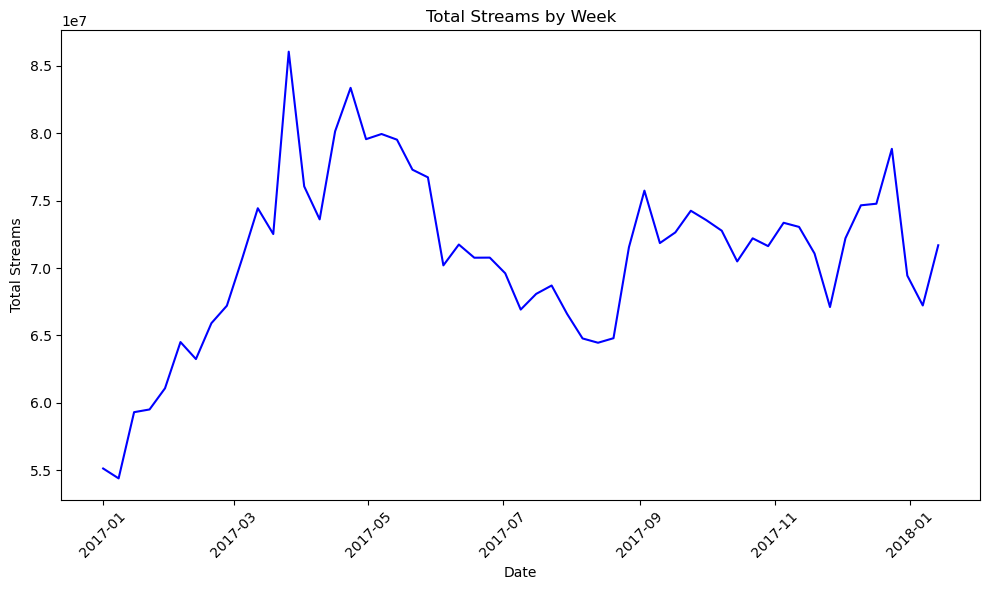

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_mean_df, color='blue')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Total Streams by Week')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Stream for a single song

In [41]:
df

,position,track_name,artist,streams,date,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,2017-01-01,us,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,343150.0,4.0
1,2,Fake Love,Drake,1180074,2017-01-01,us,0.927,0.488,9.0,-9.433,0.0,0.4200,0.108,0.000000,0.196,0.605,133.987,210937.0,4.0
2,3,Starboy,The Weeknd,1064351,2017-01-01,us,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165,0.000003,0.134,0.535,186.054,230453.0,4.0
3,4,Closer,The Chainsmokers,1010492,2017-01-01,us,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,244960.0,4.0
4,5,Black Beatles,Rae Sremmurd,874289,2017-01-01,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74195,196,Portland,Drake,184537,2018-01-09,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74196,197,All On Me,Devin Dawson,184519,2018-01-09,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74197,198,From The D To The A (feat. Lil Yachty),Tee Grizzley,184428,2018-01-09,us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74198,199,Now Or Never,Halsey,184394,2018-01-09,us,0.658,0.588,6.0,-4.902,0.0,0.0367,0.105,0.000001,0.125,0.434,110.075,214802.0,4.0


In [42]:
shape_of_you = df[df['track_name'] == 'Shape of You'][['streams','date']]
shape_of_you.set_index('date', inplace = True)
shape_of_you.head()

,streams
date,
2017-01-06,1517787
2017-01-07,1437473
2017-01-08,1346146
2017-01-09,1532772
2017-01-10,1512685


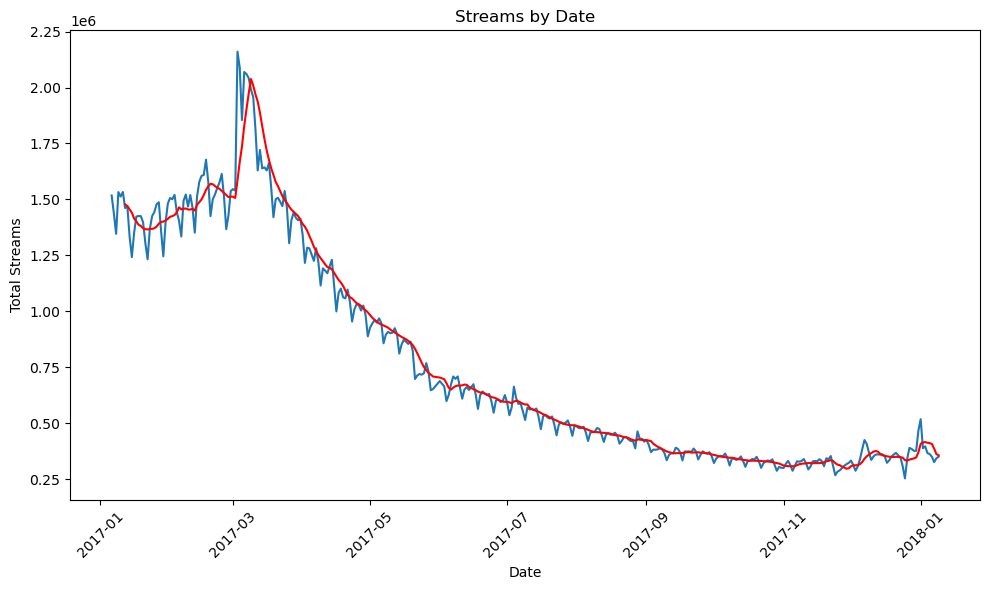

In [43]:
rollmean = pd.DataFrame.rolling(shape_of_you, window = 7).mean()

plt.figure(figsize=(10, 6))
plt.plot(shape_of_you)
plt.plot(rollmean, color = 'red', label = 'mean')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.title('Streams by Date')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
shape_of_you

,streams
date,
2017-01-06,1517787
2017-01-07,1437473
2017-01-08,1346146
2017-01-09,1532772
2017-01-10,1512685
...,...
2018-01-05,362473
2018-01-06,350302
2018-01-07,326365


## SARIMA

In [45]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(shape_of_you['streams'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.073236929952196
p-value: 0.7256258723110086
Critical Values: {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}


C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


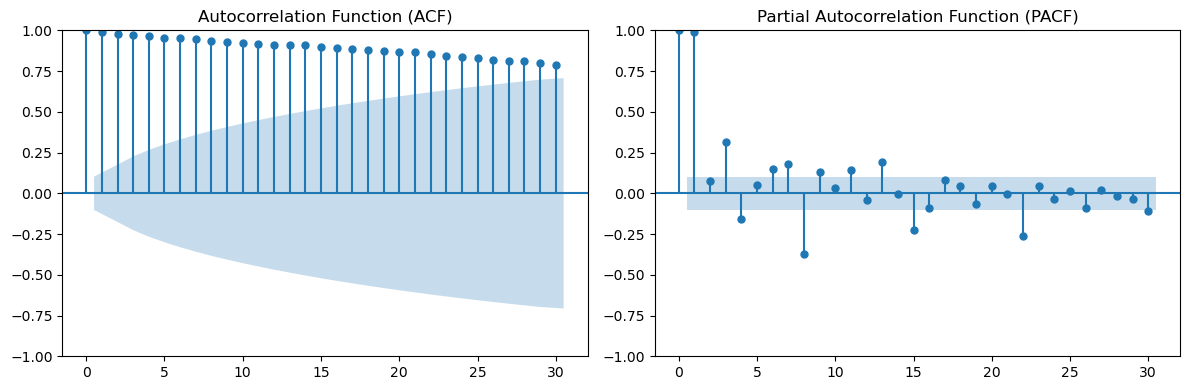

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(shape_of_you['streams'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(shape_of_you['streams'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [47]:
# First difference
shape_of_you_diff = shape_of_you['streams'].diff().dropna()

# ADF test on the differenced series
result_diff = adfuller(shape_of_you_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

ADF Statistic (Differenced): -4.380146655014483
p-value (Differenced): 0.0003217901358439654
Critical Values (Differenced): {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}


C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


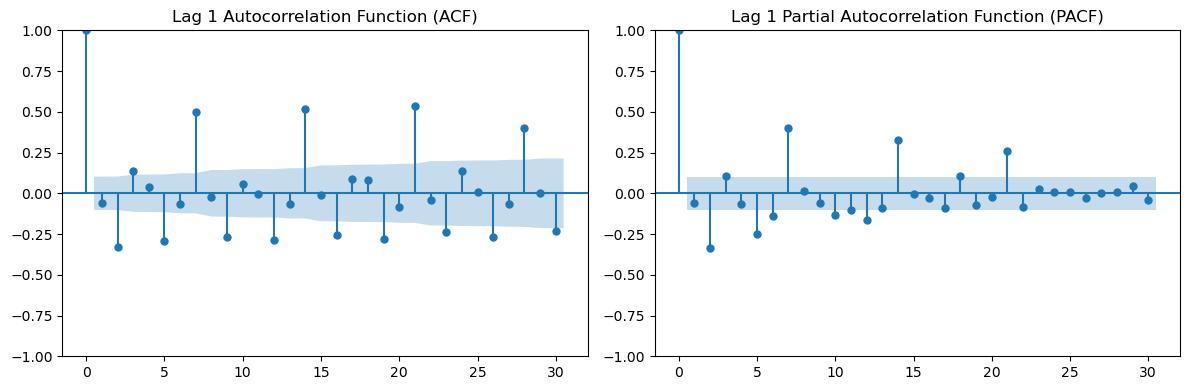

In [48]:
lag1_shape_of_you = shape_of_you - shape_of_you.shift(1)
lag1_shape_of_you.dropna(inplace = True)

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(lag1_shape_of_you['streams'], lags=30, ax=ax1)
ax1.set_title('Lag 1 Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(lag1_shape_of_you['streams'], lags=30, ax=ax2)
ax2.set_title('Lag 1 Partial Autocorrelation Function (PACF)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [49]:
# Calculate the index for the split based on the percentage
split_index = int(len(shape_of_you) * 0.8)

# Extract training and testing sets
train = shape_of_you[:split_index]
test = shape_of_you[split_index:]

In [50]:
# SARIMA parameters based on interpretation
order = (1, 1, 0)  # Non-seasonal part
seasonal_order = (1, 0, 1, 7)  # Seasonal part

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(train['streams'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             streams   No. Observations:                  292
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 7)   Log Likelihood               -3495.860
Date:                             Fri, 01 Dec 2023   AIC                           6999.721
Time:                                     16:05:05   BIC                           7014.302
Sample:                                          0   HQIC                          7005.567
                                             - 292                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0269      0.087     -0.309      0.758      -0.198       0.144
ar.S.L7        0.7533      

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


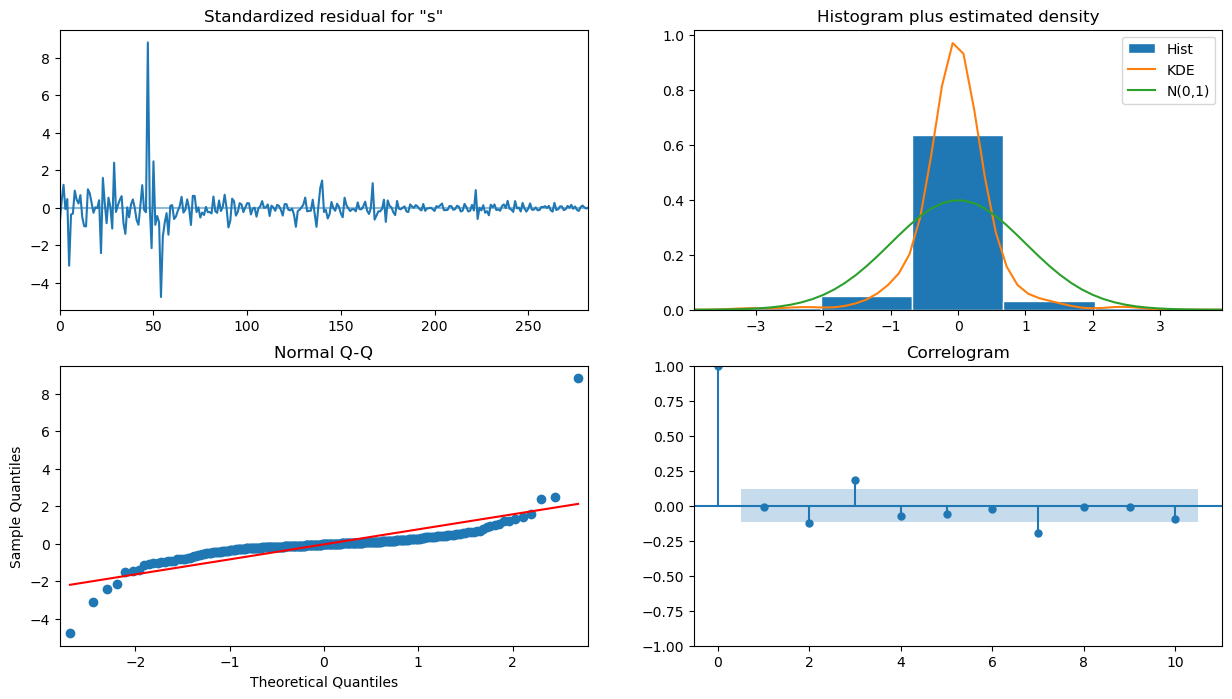

In [51]:
# Plot diagnostics
sarima_results.plot_diagnostics(figsize=(15, 8))
plt.show()

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


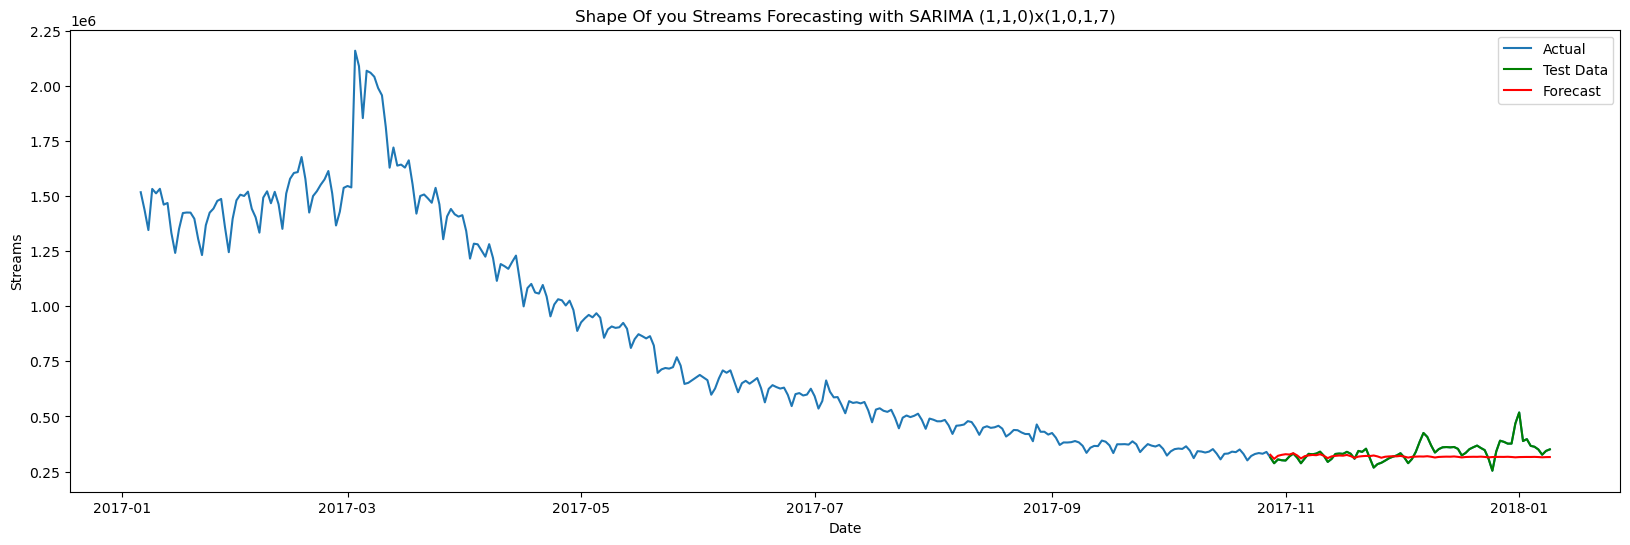

In [52]:
# Forecast future values
forecast_steps = len(test)  # Forecast for the length of the test set
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Corrected: Access the index directly for the forecast
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(shape_of_you['streams'], label='Actual')
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#plt.scatter(test.index, test['streams'], label='Test Data', color='green')  # Add test data points
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Shape Of you Streams Forecasting with SARIMA (1,1,0)x(1,0,1,7)')
plt.legend()
plt.show()


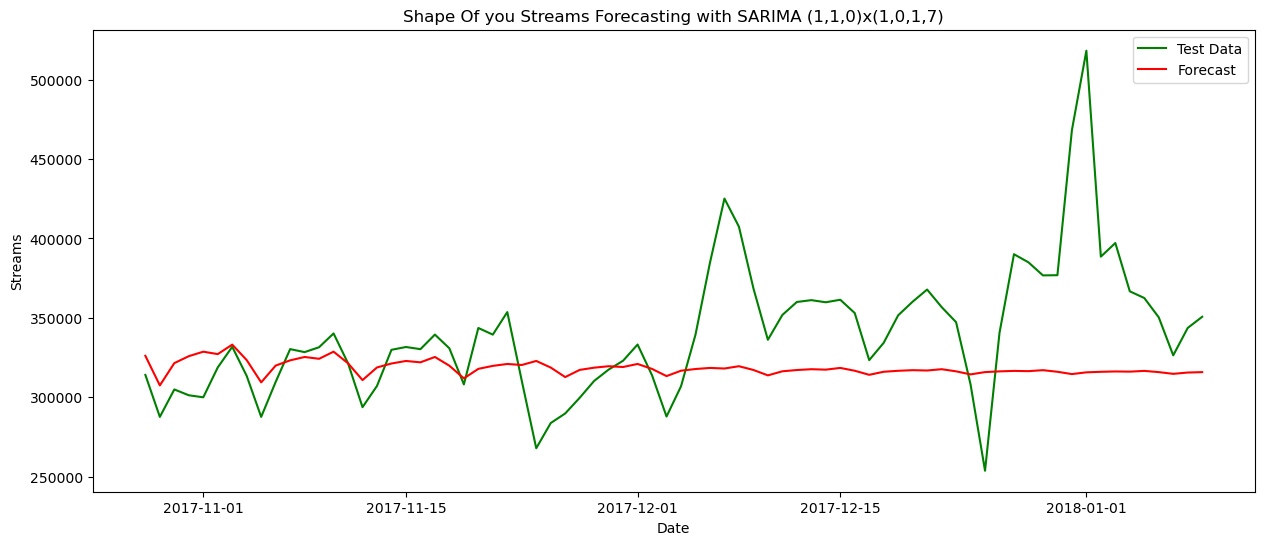

In [53]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Shape Of you Streams Forecasting with SARIMA (1,1,0)x(1,0,1,7)')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test['streams'].values

# Extract the predicted values from the forecast
predicted_values = forecast.predicted_mean.values

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 33060.65760417924
Mean Squared Error (MSE): 2221372002.3052073
Root Mean Squared Error (RMSE): 47131.4332723418
Mean Absolute Percentage Error (MAPE): 9.10%


## Sec

In [55]:
# SARIMA parameters based on interpretation
order = (1, 1, 0)  # Non-seasonal part
seasonal_order = (1, 1, 0, 7)  # Seasonal part

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(train['streams'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           streams   No. Observations:                  292
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -3410.150
Date:                           Fri, 01 Dec 2023   AIC                           6826.300
Time:                                   16:05:06   BIC                           6837.162
Sample:                                        0   HQIC                          6830.659
                                           - 292                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0309      0.080     -0.387      0.699      -0.187       0.125
ar.S.L7       -0.5253      0.016    -33.084

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


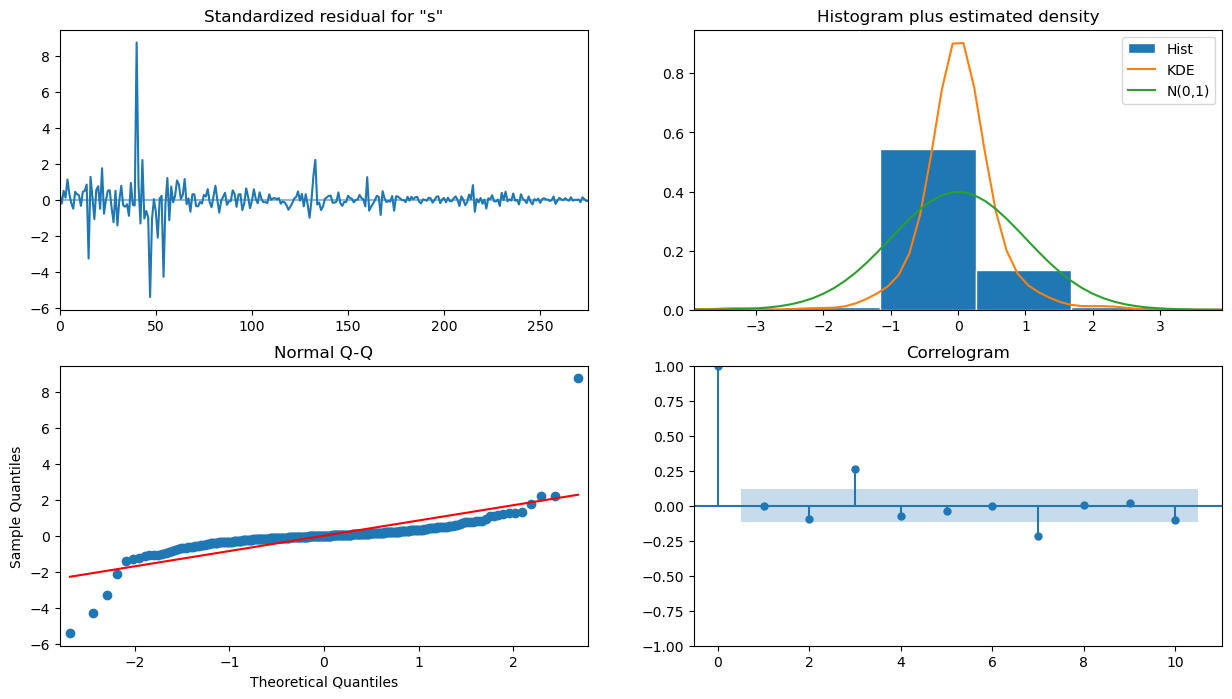

In [56]:
# Plot diagnostics
sarima_results.plot_diagnostics(figsize=(15, 8))
plt.show()

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


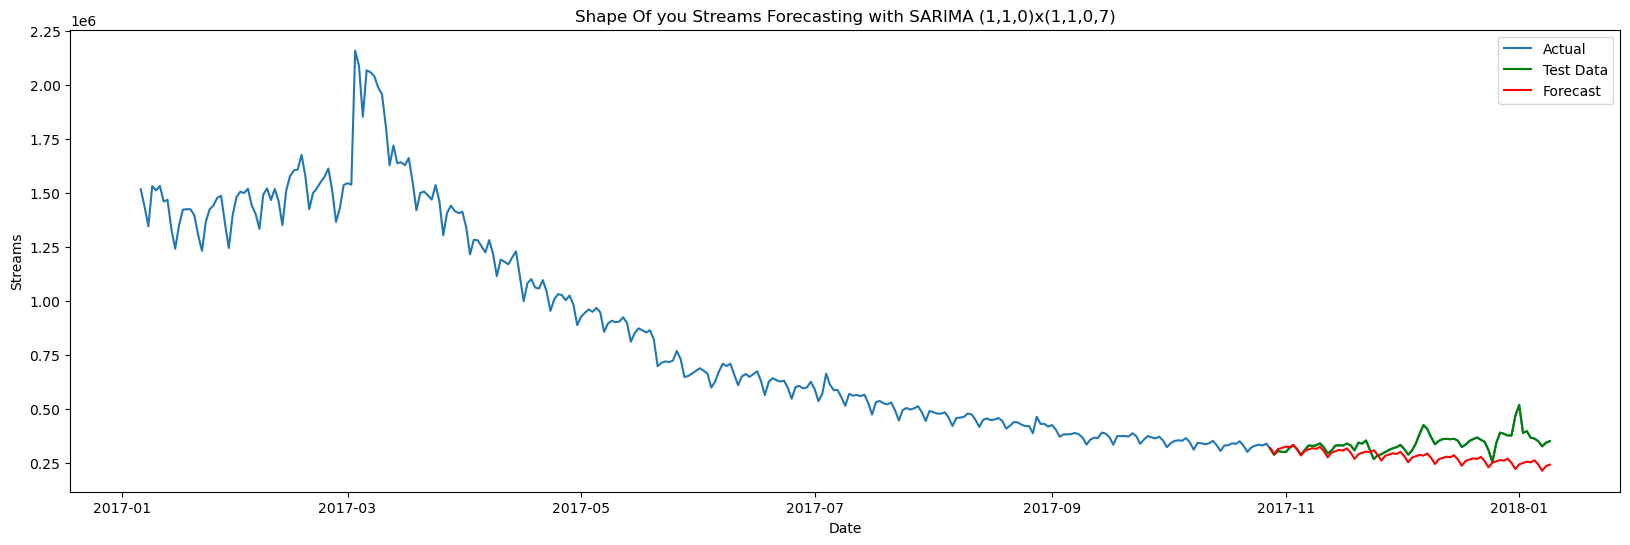

In [57]:
# Forecast future values
forecast_steps = len(test)  # Forecast for the length of the test set
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Corrected: Access the index directly for the forecast
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(shape_of_you['streams'], label='Actual')
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
#plt.scatter(test.index, test['streams'], label='Test Data', color='green')  # Add test data points
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Shape Of you Streams Forecasting with SARIMA (1,1,0)x(1,1,0,7)')
plt.legend()
plt.show()

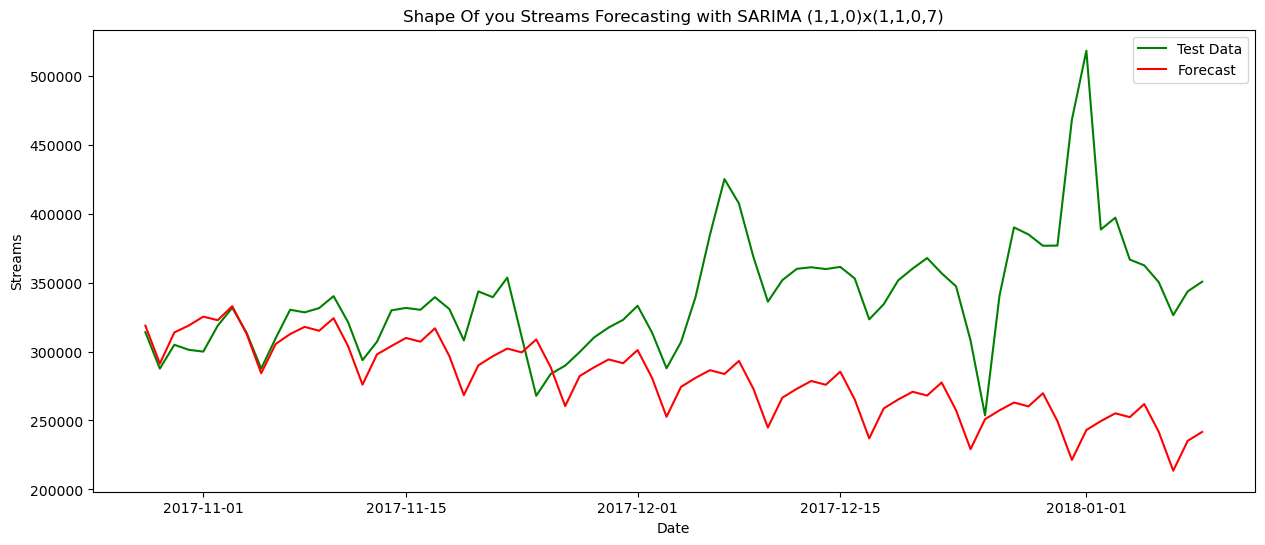

In [58]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Shape Of you Streams Forecasting with SARIMA (1,1,0)x(1,1,0,7)')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test['streams'].values

# Extract the predicted values from the forecast
predicted_values = forecast.predicted_mean.values

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (MSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 62443.8479214933
Mean Squared Error (MSE): 6794423545.420492
Root Mean Squared Error (MSE): 82428.2933550155
Mean Absolute Percentage Error (MAPE): 17.14%


## Third

In [60]:
# Fit SARIMA model
sarima_model = SARIMAX(train['streams'], trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             streams   No. Observations:                  292
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -3528.663
Date:                             Fri, 01 Dec 2023   AIC                           7065.326
Time:                                     16:05:08   BIC                           7079.922
Sample:                                          0   HQIC                          7071.178
                                             - 292                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.6570     40.229      0.016      0.987     -78.190      79.504
ar.L1          0.0142      

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


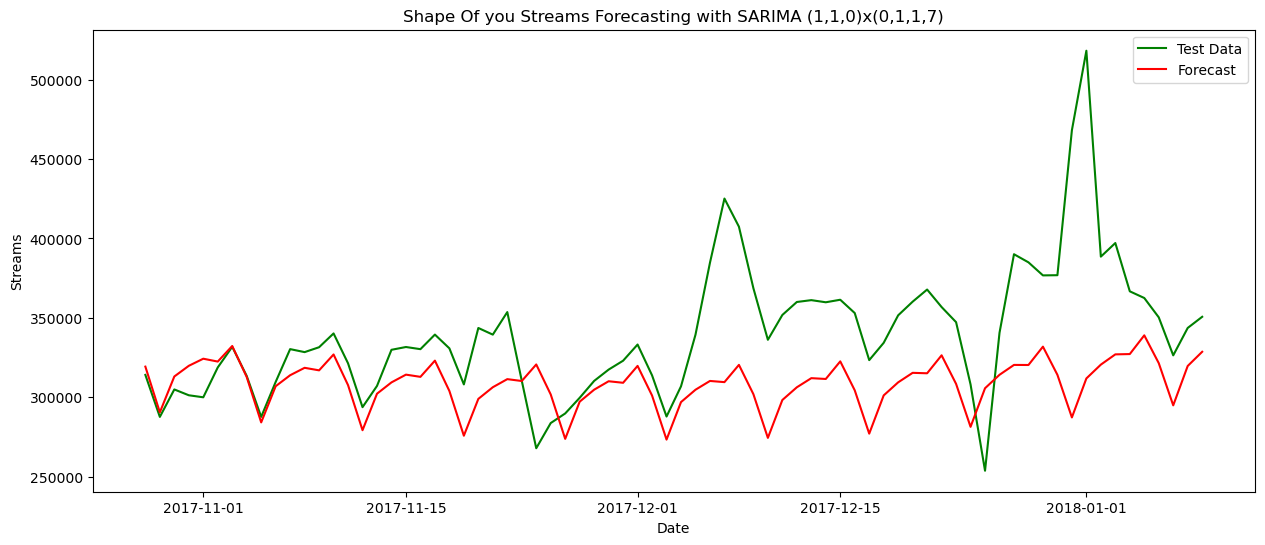

In [61]:
# Forecast future values
forecast_steps = len(test)  # Forecast for the length of the test set
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Corrected: Access the index directly for the forecast
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Shape Of you Streams Forecasting with SARIMA (1,1,0)x(0,1,1,7)')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test['streams'].values

# Extract the predicted values from the forecast
predicted_values = forecast.predicted_mean.values

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (MSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 35633.37708092534
Mean Squared Error (MSE): 2511926159.8666277
Root Mean Squared Error (MSE): 50119.11970362835
Mean Absolute Percentage Error (MAPE): 9.77%


## Fourth

In [63]:
# Fit SARIMA model
sarima_model = SARIMAX(train['streams'], trend = [0,1,0,0], order=(2,1,0), seasonal_order=(0,1,1,7))
sarima_results = sarima_model.fit()

# Print model summary
print(sarima_results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             streams   No. Observations:                  292
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -3528.561
Date:                             Fri, 01 Dec 2023   AIC                           7067.123
Time:                                     16:05:08   BIC                           7085.368
Sample:                                          0   HQIC                          7074.438
                                             - 292                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.7099     40.475      0.018      0.986     -78.619      80.039
ar.L1          0.0151      

C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\zoesu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


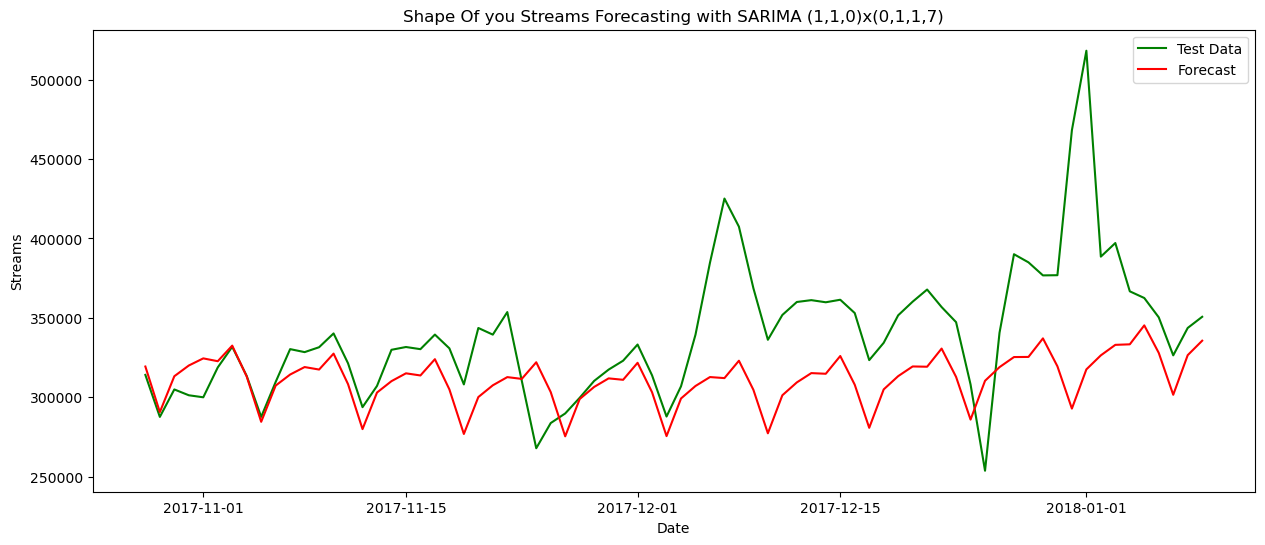

In [64]:
# Forecast future values
forecast_steps = len(test)  # Forecast for the length of the test set
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Corrected: Access the index directly for the forecast
forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(test.index, test['streams'], label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Shape Of you Streams Forecasting with SARIMA (1,1,0)x(0,1,1,7)')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual values from the test set
actual_values = test['streams'].values

# Extract the predicted values from the forecast
predicted_values = forecast.predicted_mean.values

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (MSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 33241.689065390754
Mean Squared Error (MSE): 2280404159.992496
Root Mean Squared Error (MSE): 47753.57745753187
Mean Absolute Percentage Error (MAPE): 9.12%


## LSTM

In [66]:
shape_of_you

,streams
date,
2017-01-06,1517787
2017-01-07,1437473
2017-01-08,1346146
2017-01-09,1532772
2017-01-10,1512685
...,...
2018-01-05,362473
2018-01-06,350302
2018-01-07,326365


In [67]:
# Preprocess the data
data = shape_of_you['streams'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the function to create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i : i + seq_length]
        label = data[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define the sequence length (adjust as needed)
seq_length = 10

# Create sequences and labels
sequences, labels = create_sequences(scaled_data, seq_length)

# Split the data into training and testing sets
split_index = int(len(sequences) * 0.8)
X_train, y_train = sequences[:split_index], labels[:split_index]
X_test, y_test = sequences[split_index:], labels[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform the predictions to the original scale
predicted_values = scaler.inverse_transform(predicted_values)


Epoch 1/50
9/9 - 2s - loss: 0.1226 - val_loss: 5.2691e-04 - 2s/epoch - 198ms/step
Epoch 2/50
9/9 - 0s - loss: 0.0455 - val_loss: 0.0055 - 67ms/epoch - 7ms/step
Epoch 3/50
9/9 - 0s - loss: 0.0127 - val_loss: 0.0177 - 68ms/epoch - 8ms/step
Epoch 4/50
9/9 - 0s - loss: 0.0100 - val_loss: 0.0093 - 76ms/epoch - 8ms/step
Epoch 5/50
9/9 - 0s - loss: 0.0056 - val_loss: 0.0031 - 76ms/epoch - 8ms/step
Epoch 6/50
9/9 - 0s - loss: 0.0042 - val_loss: 0.0029 - 87ms/epoch - 10ms/step
Epoch 7/50
9/9 - 0s - loss: 0.0032 - val_loss: 0.0012 - 81ms/epoch - 9ms/step
Epoch 8/50
9/9 - 0s - loss: 0.0027 - val_loss: 5.3626e-04 - 80ms/epoch - 9ms/step
Epoch 9/50
9/9 - 0s - loss: 0.0027 - val_loss: 4.6567e-04 - 78ms/epoch - 9ms/step
Epoch 10/50
9/9 - 0s - loss: 0.0026 - val_loss: 4.1638e-04 - 84ms/epoch - 9ms/step
Epoch 11/50
9/9 - 0s - loss: 0.0026 - val_loss: 5.3411e-04 - 82ms/epoch - 9ms/step
Epoch 12/50
9/9 - 0s - loss: 0.0024 - val_loss: 4.4793e-04 - 77ms/epoch - 9ms/step
Epoch 13/50
9/9 - 0s - loss: 0.0025 

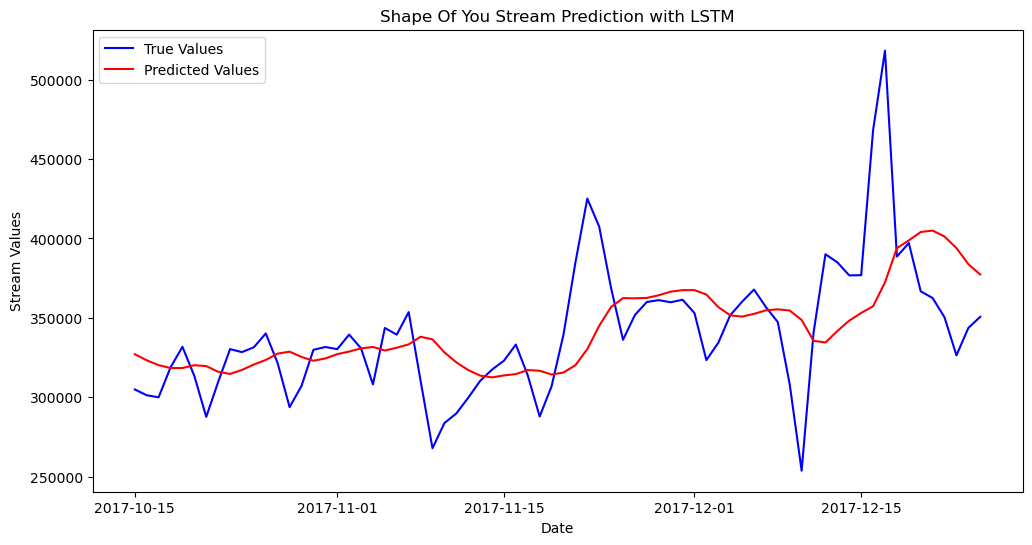

In [68]:
import matplotlib.pyplot as plt

# Get the dates corresponding to the test set
test_dates = dftotal.index[split_index : split_index + len(predicted_values)]

# Inverse transform the original test data to the original scale
true_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, true_values, label='True Values', color='blue')

# Plot the predicted values
plt.plot(test_dates, predicted_values, label='Predicted Values', color='red')

plt.title('Shape Of You Stream Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stream Values')
plt.legend()
plt.show()


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, MAPE
mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
# Calculate MAPE
mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 25680.844184027777
Mean Squared Error (MSE): 1415022837.8544517
Root Mean Squared Error (RMSE): 37616.78930815935
Mean Absolute Percentage Error (MAPE): 7.42%
